In [10]:
import sys
sys.path.append('..')
from src.pomdp import *

import numpy as np

## Model definition

In [11]:
states = ['tiger-left', 'tiger-right']
actions = ['listen', 'open-left', 'open-right']
observations = ['tiger-left', 'tiger-right']

In [12]:
# Action: listen
listen_transitions = [[1,0],
                      [0,1]]
# Action: open-left or open-right
open_transitions = [[0.5,0.5],
                    [0.5,0.5]]

transition_table = np.zeros((len(states), len(actions), len(observations)))
for i,_ in enumerate(states):
    for j,_ in enumerate(actions):
        action_t = listen_transitions if j == 0 else open_transitions
        for k,_ in enumerate(observations):
            transition_table[i,j,k] = action_t[i][k]

transition_table

array([[[1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5]],

       [[0. , 1. ],
        [0.5, 0.5],
        [0.5, 0.5]]])

In [13]:
def reward_func(s,a,s_p,o):
    return np.where((a==0), -1, np.where((s_p==a-1), -100, 10))

In [14]:
reward_table = np.zeros((len(states),len(actions), len(states), len(observations)))
for i,_ in enumerate(states):
    for j,_ in enumerate(actions):
        if j == 0: # Listen
            reward_table[i,j,:,:] = -1
        else: # Open
            reward_table[i,j,:,:] = -100 if i == j-1 else 10 # If tiger in door opened, -100 else, won with 10

reward_table

array([[[[  -1.,   -1.],
         [  -1.,   -1.]],

        [[-100., -100.],
         [-100., -100.]],

        [[  10.,   10.],
         [  10.,   10.]]],


       [[[  -1.,   -1.],
         [  -1.,   -1.]],

        [[  10.,   10.],
         [  10.,   10.]],

        [[-100., -100.],
         [-100., -100.]]]])

In [15]:
observation_table = np.zeros((len(states), len(actions), len(observations)))

for i,_ in enumerate(states):
    for k,_ in enumerate(observations):
        observation_table[i,0,k] = (0.85 if i == k else 0.15)

        for a in [1,2]:
            observation_table[i,a,k] = 0.5

In [16]:
model = Model(states=states,
              actions=actions,
              observations=observations, 
              transitions=transition_table,
            #   rewards=reward_func,
              rewards=reward_table,
              observation_table=observation_table)

[01/21/2024, 15:19:16] Instantiation of MDP Model:
[01/21/2024, 15:19:16] - 2 states
[01/21/2024, 15:19:16] - 3 actions
[01/21/2024, 15:19:16] - Starting generation of transitions table
[01/21/2024, 15:19:16]     > Done in 0.000s
[01/21/2024, 15:19:16] - Generation of state grid
[01/21/2024, 15:19:16] - Generating start probabilities table
[01/21/2024, 15:19:16] - Starting computation of reachable states from transition data
[01/21/2024, 15:19:16]     > Done in 0.000s
[01/21/2024, 15:19:16] - At most 2 reachable states per state-action pair
[01/21/2024, 15:19:16] - Starting computation of reachable state probabilities from transition data
[01/21/2024, 15:19:16]     > Done in 0.000s

[01/21/2024, 15:19:16] POMDP particular parameters:
[01/21/2024, 15:19:16] - 2 observations
[01/21/2024, 15:19:16] - Starting of transitional observations for reachable states table
[01/21/2024, 15:19:16]     > Done in 0.000s
[01/21/2024, 15:19:16] - Starting generation of expected rewards table
[01/21/2024

In [17]:
model.end_actions = [1,2]

## Solving

In [18]:
solver = PBVI_Solver(0.95, eps=1e-3)
solution, solve_history = solver.solve(model, 8, 20, max_belief_growth=20, history_tracking_level=2)

[01/21/2024, 15:19:16] [Warning] MDP solution not provided, running value iteration on the problem to retrieve it...
[01/21/2024, 15:19:16]     > Starting MDP Value Iteration...
[01/21/2024, 15:19:16]     > Value Iteration stopped or converged in 0.005s, and after 123 iteration.



Expansions:   0%|          | 0/8 [00:00<?, ?it/s]

<Figure size 700x500 with 0 Axes>

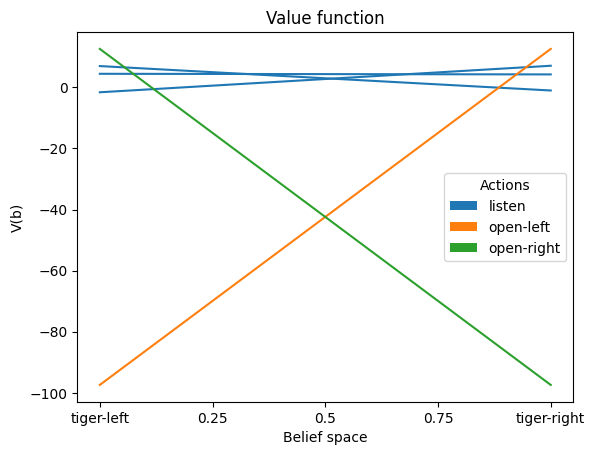

In [19]:
solution.plot()

We can see it is right from the following solved problem with the same parameters: https://pomdp.org/code/index.html

In [20]:
# solve_history.save_history_video('tiger_problem')

## Simulation

In [11]:
agent = Agent(model)
agent.train(solver,8,20)

Expansions:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 0:   0%|          | 0/20 [00:00<?, ?it/s]

Backups 1:   0%|          | 0/20 [00:00<?, ?it/s]

Backups 2:   0%|          | 0/20 [00:00<?, ?it/s]

Backups 3:   0%|          | 0/20 [00:00<?, ?it/s]

Backups 4:   0%|          | 0/20 [00:00<?, ?it/s]

Backups 5:   0%|          | 0/20 [00:00<?, ?it/s]

Backups 6:   0%|          | 0/20 [00:00<?, ?it/s]

Backups 7:   0%|          | 0/20 [00:00<?, ?it/s]

Converged!


In [12]:
rewards = agent.run_n_simulations()

  0%|          | 0/1000 [00:00<?, ?it/s]

All 1000 simulations done:
	- Average runtime (s): 0.00046220800000000003
	- Average step count: 4.636
	- Average total rewards: 3.624


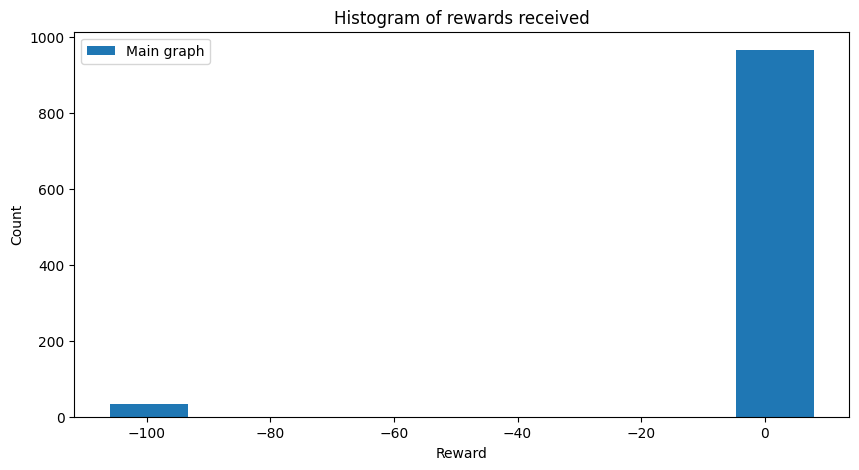

In [13]:
rewards.plot('histogram')

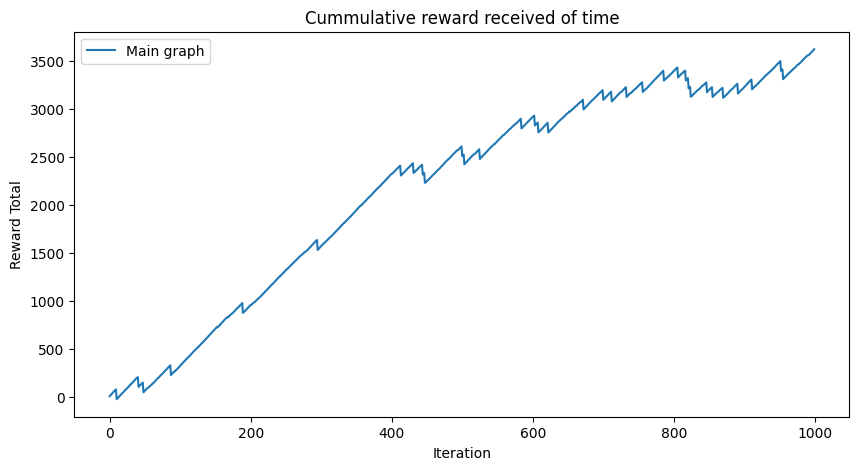

In [14]:
rewards.plot('total')